# 9. Image adjustment: transforming image content

[Original website](https://scikit-image.org/docs/stable/user_guide/transforming_image_data.html)

## Color

In [1]:
from skimage import color
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt

In [2]:
red_pixel_rgb = np.array([[[255, 0, 0]]], dtype=np.uint8)
color.rgb2hsv(red_pixel_rgb)

array([[[0., 1., 1.]]])

In [3]:
logo_rgba = ski.data.logo()
logo_rgb = color.rgba2rgb(logo_rgba)
logo_gray = color.rgb2gray(logo_rgb)
logo_rgba.shape, logo_rgb.shape, logo_gray.shape

((500, 500, 4), (500, 500, 3), (500, 500))

## Contrast and exposure

Some exposure adjustments are independent of the image's intensity values (often correcting for known non-linearity of sensors or receptors viewing the image, e.g. the human eye) while others adjust the image based on the distribution of intensity values. Some examples:

1. The Gamma correction is a non-linear, image-independent exposure adjustment method.
2. The `rescale_intensity()` function applies a linear transformation to the image to use the full range of available intensity values (determined by the data type).
3. The image can be rescaled by adjusting the CDF of the intensities to match that of a linear function. There is also an adaptive method to correct exposure gradients across the image.

In [4]:
moon_img = ski.data.moon()
moon_img.shape

(512, 512)

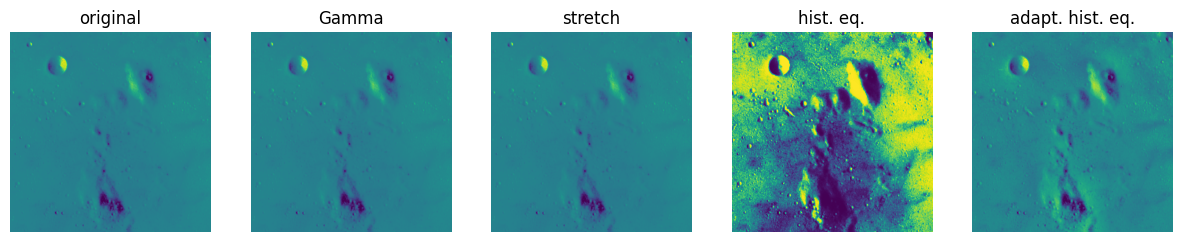

In [5]:
moon_gamma = ski.exposure.adjust_gamma(moon_img)
moon_stretch = ski.exposure.rescale_intensity(moon_img)
moon_eq = ski.exposure.equalize_hist(moon_img)
moon_adapt_eq = ski.exposure.equalize_adapthist(moon_img)

fig, axes = plt.subplots(ncols=5, figsize=(15, 3), sharex=True, sharey=True)
axes = axes.flatten()
for i, (lbl, img) in enumerate(
    [
        ("original", moon_img),
        ("Gamma", moon_gamma),
        ("stretch", moon_stretch),
        ("hist. eq.", moon_eq),
        ("adapt. hist. eq.", moon_adapt_eq),
    ]
):
    axes[i].imshow(img)
    axes[i].set_title(lbl)
    axes[i].set_axis_off()

plt.show()